In [73]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
import joblib
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

In [60]:
df=pd.read_csv('breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [61]:
df.isna().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [62]:
print(df.duplicated().sum())
df.describe()

0


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [63]:
df = df.drop('id', axis=1)

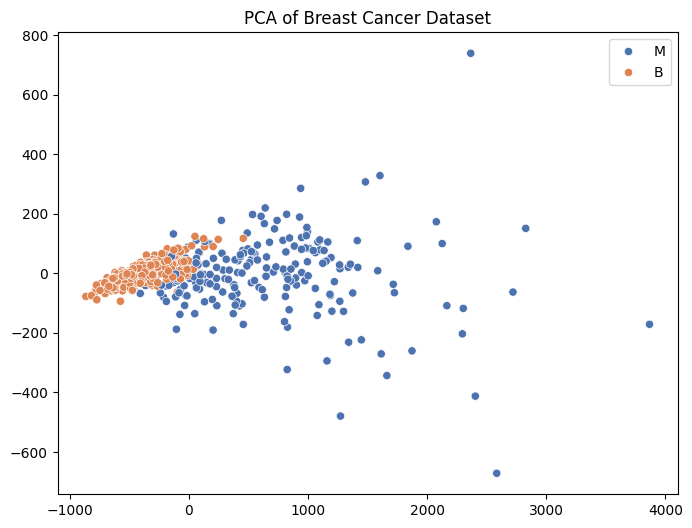

In [64]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df.drop(['diagnosis'], axis=1))

plt.figure(figsize=(8, 6))
hue_labels = df['diagnosis'].values
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hue_labels, palette='deep')
plt.title("PCA of Breast Cancer Dataset")
plt.show()


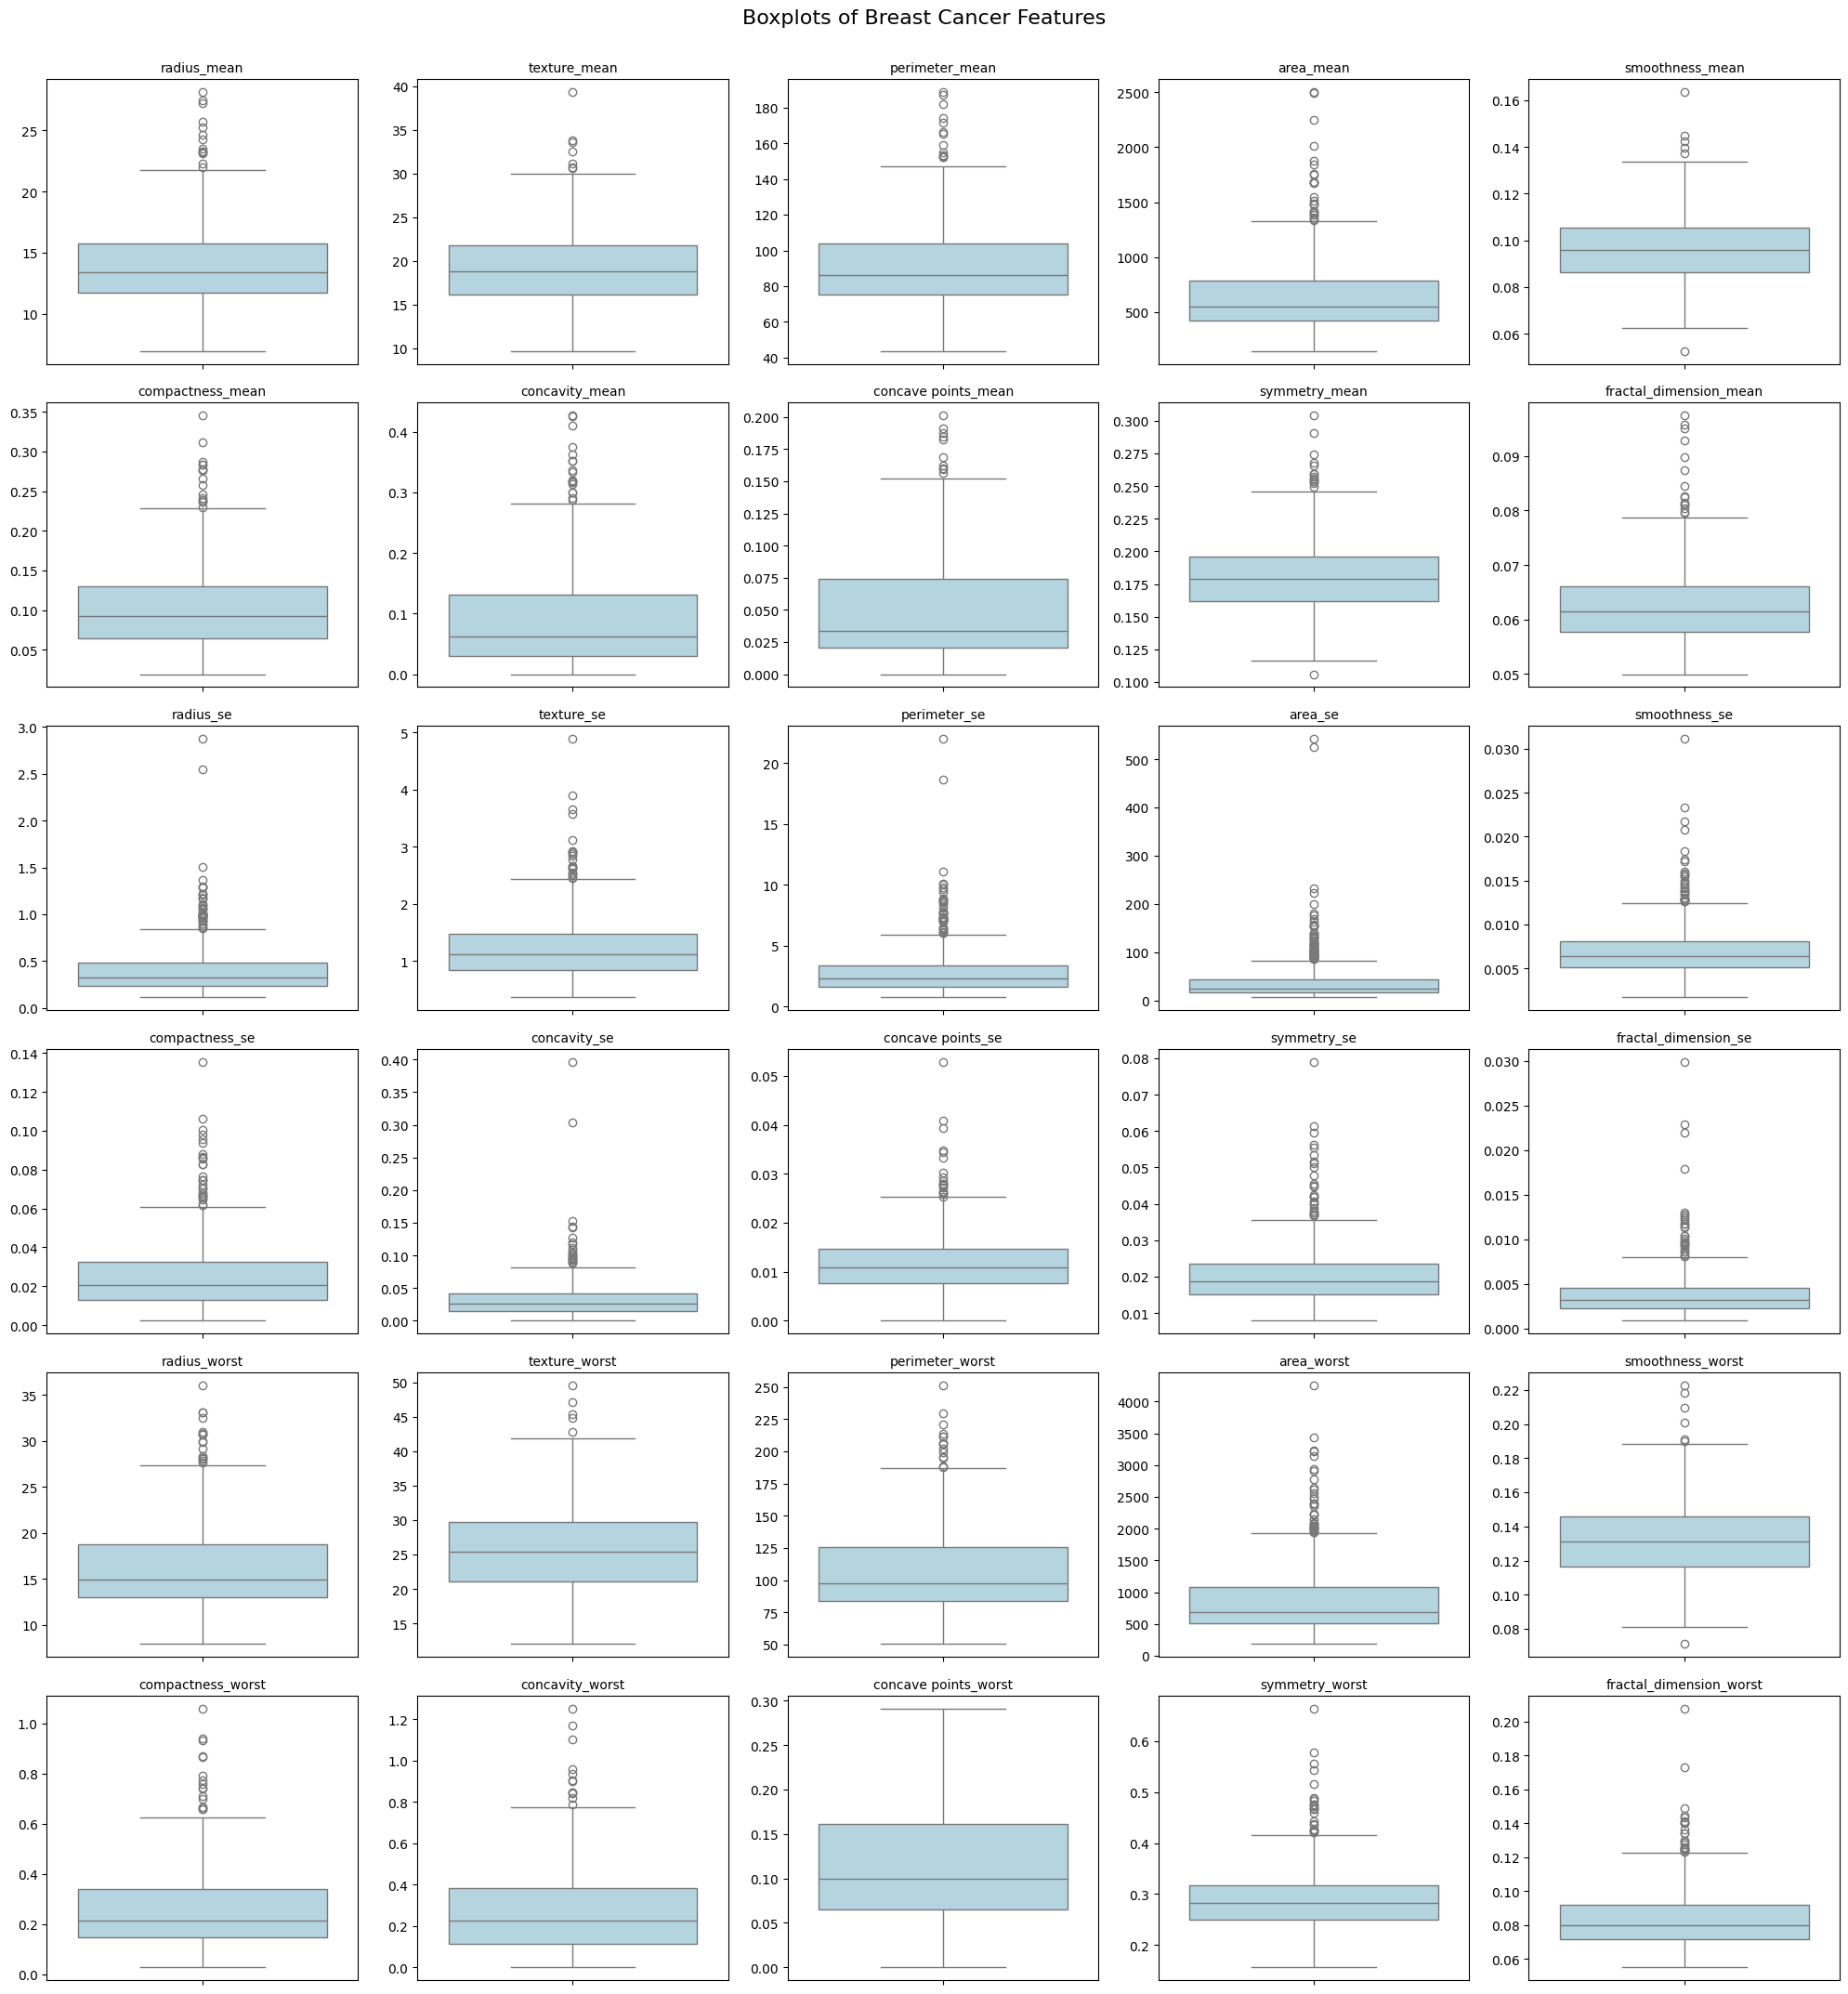

In [65]:
feature_columns = df.columns.drop(['diagnosis'])

n_cols = 5
n_rows = (len(feature_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 3.5))

for idx, col in enumerate(feature_columns, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle("Boxplots of Breast Cancer Features", fontsize=16, y=1.02)
plt.show()

In [66]:
def remove_outliers_iqr_per_class(df, label_col='diagnosis'):
    df_no_outliers = pd.DataFrame()

    for label in df[label_col].unique():
        class_df = df[df[label_col] == label]
        filtered_df = class_df.copy()

        for col in class_df.select_dtypes(include='number').columns:
            if col == label_col:
                continue
            Q1 = class_df[col].quantile(0.25)
            Q3 = class_df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            filtered_df = filtered_df[
                (filtered_df[col] >= lower_bound) & (filtered_df[col] <= upper_bound)
            ]

        df_no_outliers = pd.concat([df_no_outliers, filtered_df], axis=0)

    return df_no_outliers.reset_index(drop=True)
df_clean = remove_outliers_iqr_per_class(df)

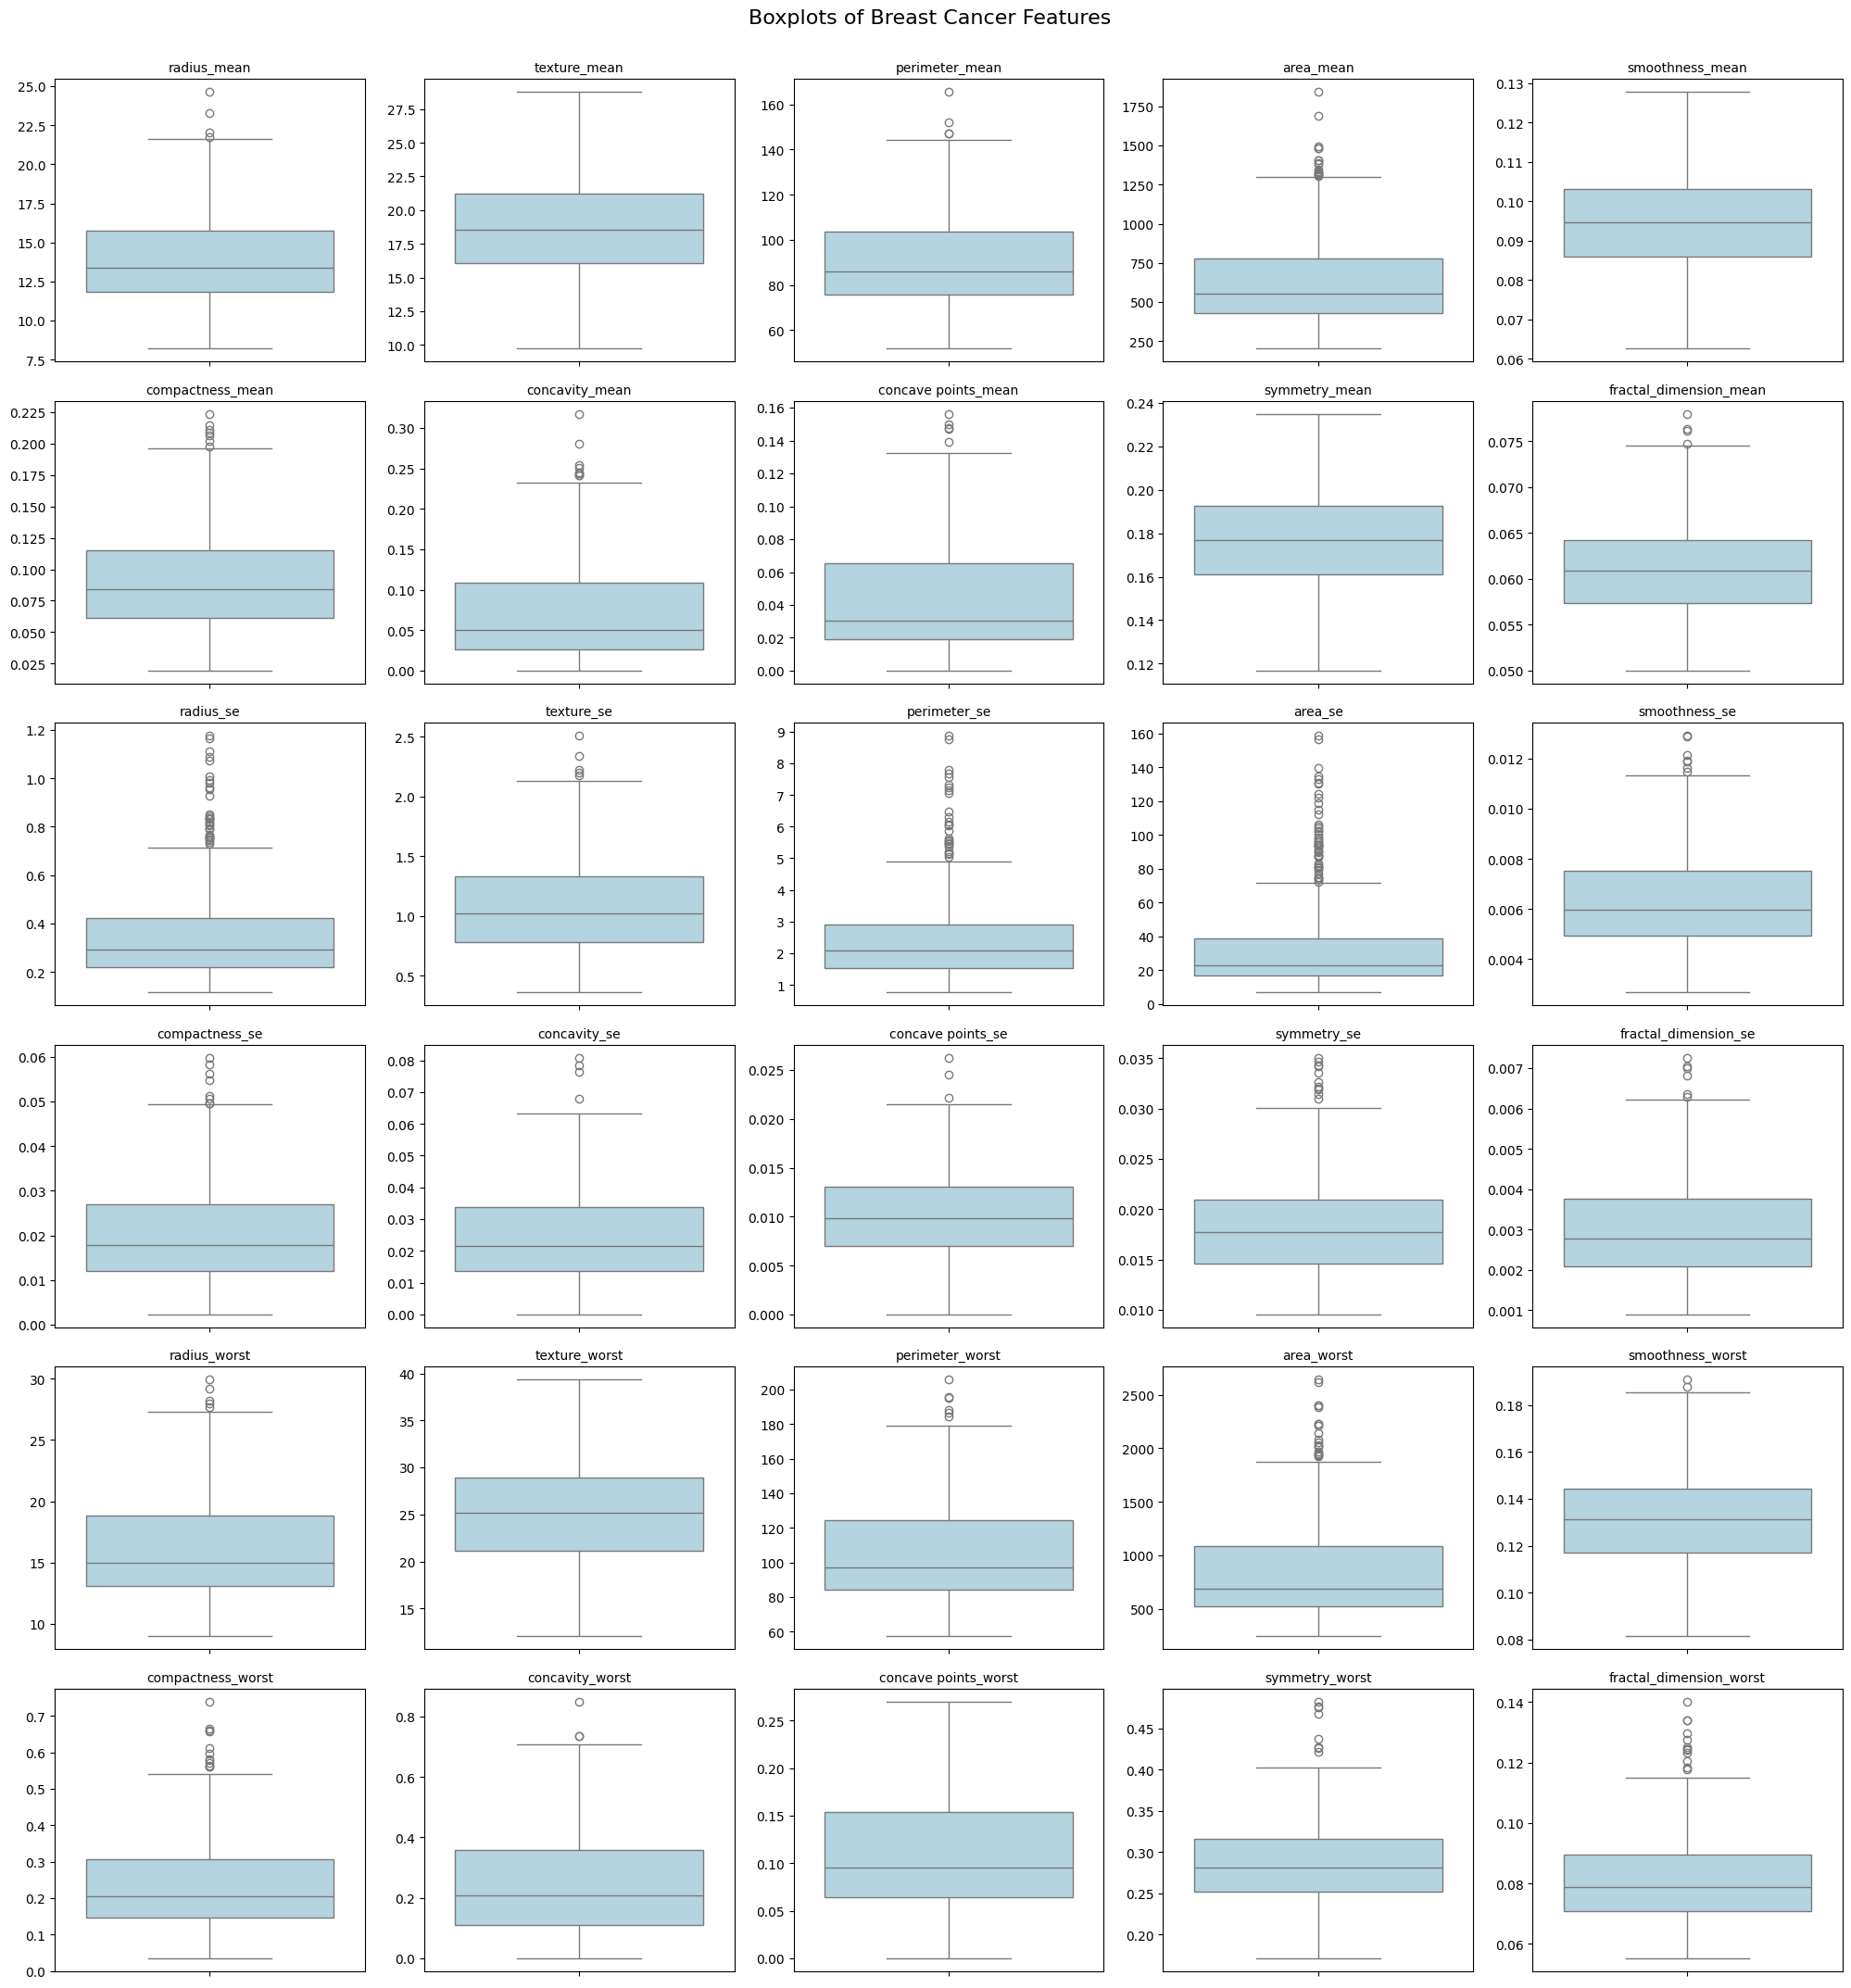

In [67]:
n_cols = 5
n_rows = (len(feature_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(n_cols * 4, n_rows * 3.5))

for idx, col in enumerate(feature_columns, 1):
    plt.subplot(n_rows, n_cols, idx)
    sns.boxplot(y=df_clean[col], color='lightblue')
    plt.title(col, fontsize=10)
    plt.xlabel('')
    plt.ylabel('')

plt.tight_layout()
plt.suptitle("Boxplots of Breast Cancer Features", fontsize=16, y=1.02)
plt.show()

In [68]:
df_clean.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.5,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.2,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
3,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
4,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.1127,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368


In [69]:
encoder= LabelEncoder()
df_clean['diagnosis'] = encoder.fit_transform(df_clean['diagnosis'])


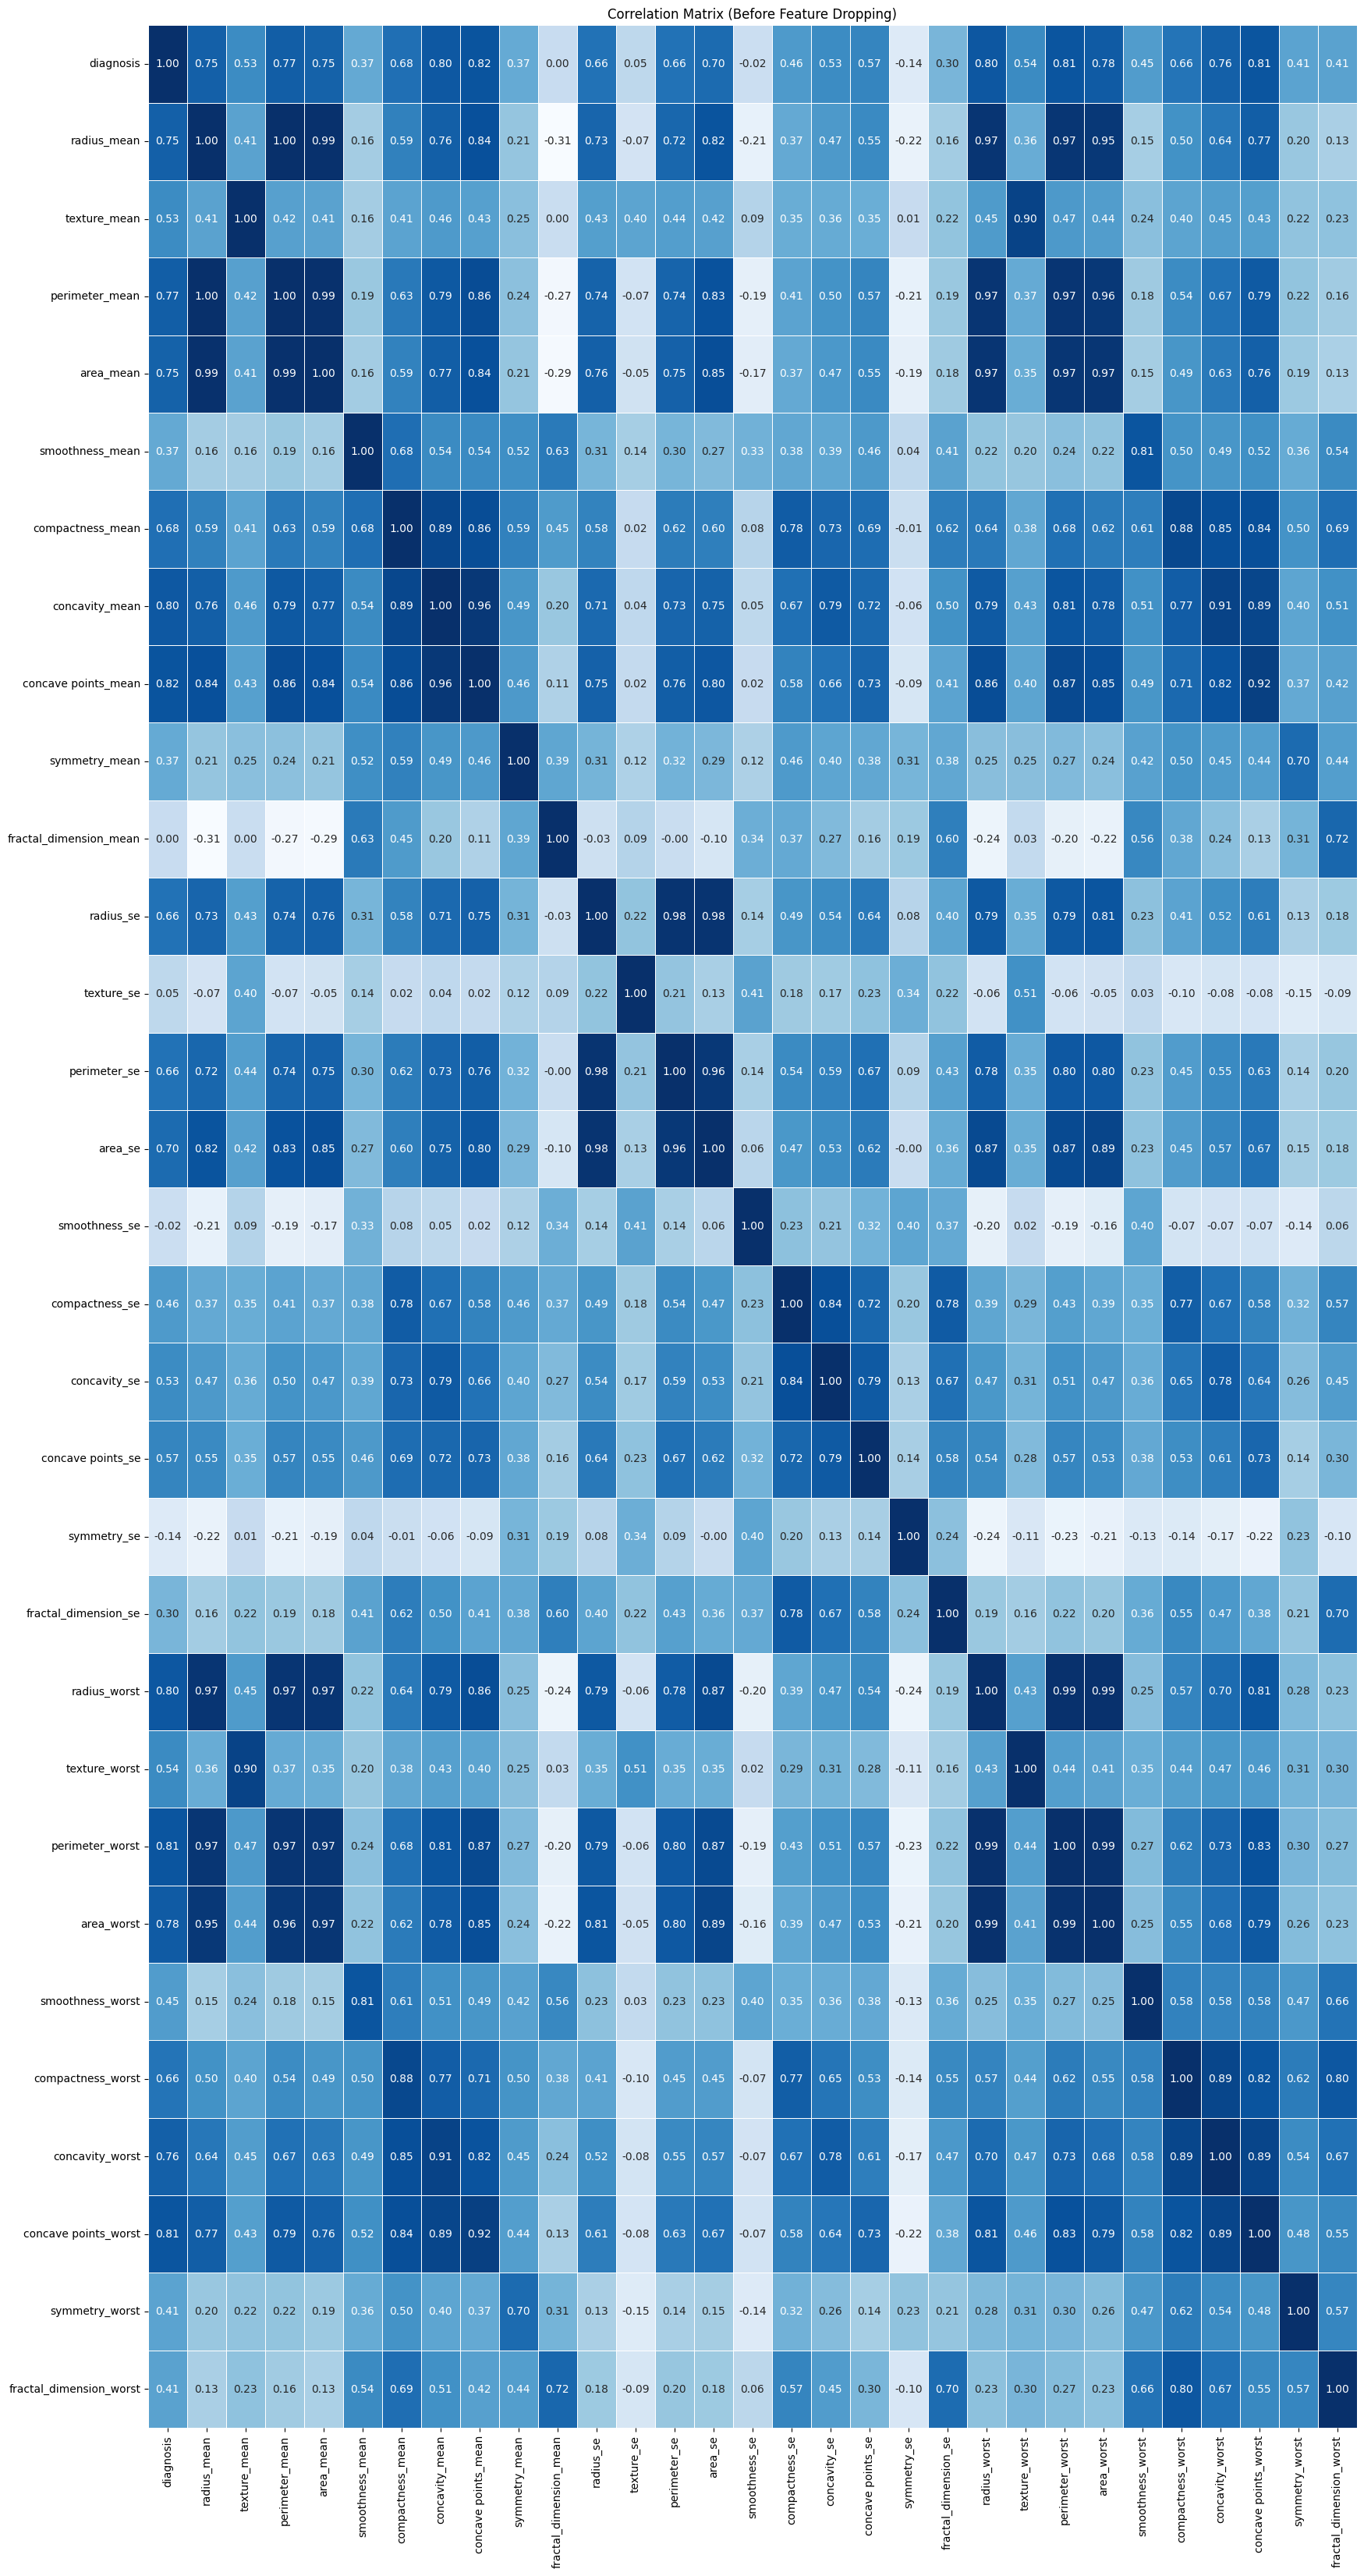

Dropped features (correlation < 0.1 with diagnosis): ['fractal_dimension_mean', 'texture_se', 'smoothness_se']


In [70]:
plt.figure(figsize=(20, 40))
sns.heatmap(df_clean.corr(), annot=True,cbar=False, cmap='Blues', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Before Feature Dropping)")
plt.show()

# Step 2: Compute absolute correlation with target 'diagnosis'
correlations = df_clean.corr()['diagnosis'].abs()

# Step 3: Identify low correlation features
low_corr_features = correlations[correlations < 0.1].index
low_corr_features = low_corr_features.drop('diagnosis', errors='ignore')

# Step 4: Drop from DataFrame
df_clean_final = df_clean.drop(columns=low_corr_features)

# Step 5: Output dropped features
print(f"Dropped features (correlation < 0.1 with diagnosis): {list(low_corr_features)}")

In [71]:
X = df_clean_final.drop('diagnosis', axis=1)
y = df_clean_final['diagnosis']

In [77]:
x_train.head(1)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,radius_se,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
355,9.668,18.1,61.06,286.3,0.08311,0.05428,0.01479,0.005769,0.168,0.3416,...,11.15,24.62,71.11,380.2,0.1388,0.1255,0.06409,0.025,0.3057,0.07875


In [72]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [74]:
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('knn', KNeighborsClassifier(n_neighbors=2))
])
knn_pipeline.fit(x_train, y_train)
knn_scores = cross_val_score(knn_pipeline, x_train, y_train, cv=5)
print("KNN Test Accuracy:", knn_pipeline.score(x_test, y_test))
print("KNN CV Scores:", knn_scores)
print("KNN CV Best:", np.max(knn_scores))
print("KNN CV Mean:", np.mean(knn_scores))
print("KNN CV Diff:", np.max(knn_scores) - np.mean(knn_scores))

# Naive Bayes
nb_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('nb', GaussianNB())
])
nb_pipeline.fit(x_train, y_train)
nb_scores = cross_val_score(nb_pipeline, x_train, y_train, cv=5)
print("Naive Bayes Test Accuracy:", nb_pipeline.score(x_test, y_test))
print("Naive Bayes CV Scores:", nb_scores)
print("Naive Bayes CV Best:", np.max(nb_scores))
print("Naive Bayes CV Mean:", np.mean(nb_scores))
print("Naive Bayes CV Diff:", np.max(nb_scores) - np.mean(nb_scores))

# Decision Tree
dt_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('dt', DecisionTreeClassifier())
])
dt_pipeline.fit(x_train, y_train)
dt_scores = cross_val_score(dt_pipeline, x_train, y_train, cv=5)
print("Decision Tree Test Accuracy:", dt_pipeline.score(x_test, y_test))
print("Decision Tree CV Scores:", dt_scores)
print("Decision Tree CV Best:", np.max(dt_scores))
print("Decision Tree CV Mean:", np.mean(dt_scores))
print("Decision Tree CV Diff:", np.max(dt_scores) - np.mean(dt_scores))

KNN Test Accuracy: 0.9382716049382716
KNN CV Scores: [0.96923077 0.95384615 0.98461538 0.92307692 0.9375    ]
KNN CV Best: 0.9846153846153847
KNN CV Mean: 0.9536538461538463
KNN CV Diff: 0.030961538461538374
Naive Bayes Test Accuracy: 0.9629629629629629
Naive Bayes CV Scores: [0.96923077 0.96923077 0.98461538 0.95384615 0.96875   ]
Naive Bayes CV Best: 0.9846153846153847
Naive Bayes CV Mean: 0.9691346153846154
Naive Bayes CV Diff: 0.015480769230769242
Decision Tree Test Accuracy: 0.9629629629629629
Decision Tree CV Scores: [0.96923077 0.93846154 0.89230769 0.95384615 0.96875   ]
Decision Tree CV Best: 0.9692307692307692
Decision Tree CV Mean: 0.9445192307692307
Decision Tree CV Diff: 0.024711538461538507


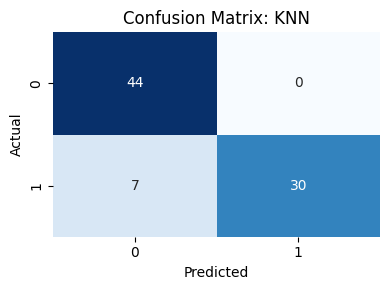

Classification Report: KNN
              precision    recall  f1-score   support

           0       0.86      1.00      0.93        44
           1       1.00      0.81      0.90        37

    accuracy                           0.91        81
   macro avg       0.93      0.91      0.91        81
weighted avg       0.93      0.91      0.91        81



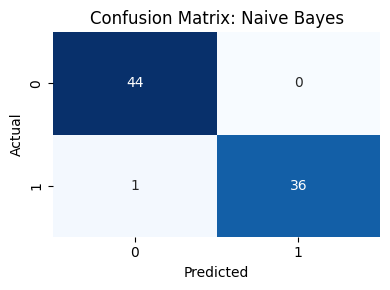

Classification Report: Naive Bayes
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        44
           1       1.00      0.97      0.99        37

    accuracy                           0.99        81
   macro avg       0.99      0.99      0.99        81
weighted avg       0.99      0.99      0.99        81



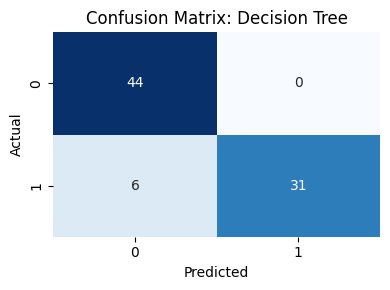

Classification Report: Decision Tree
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        44
           1       1.00      0.84      0.91        37

    accuracy                           0.93        81
   macro avg       0.94      0.92      0.92        81
weighted avg       0.93      0.93      0.93        81



In [75]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

y_pred_knn = cross_val_predict(knn_pipeline, x_test, y_test, cv=3)
y_pred_nb = cross_val_predict(nb_pipeline, x_test, y_test, cv=3)
y_pred_dt = cross_val_predict(dt_pipeline, x_test, y_test, cv=3)

plot_confusion_matrix(y_test, y_pred_knn, "Confusion Matrix: KNN")
print("Classification Report: KNN")
print(classification_report(y_test, y_pred_knn))

plot_confusion_matrix(y_test, y_pred_nb, "Confusion Matrix: Naive Bayes")
print("Classification Report: Naive Bayes")
print(classification_report(y_test, y_pred_nb))

plot_confusion_matrix(y_test, y_pred_dt, "Confusion Matrix: Decision Tree")
print("Classification Report: Decision Tree")
print(classification_report(y_test, y_pred_dt))

In [79]:
joblib.dump(knn_pipeline, 'knn_model.pkl')
joblib.dump(nb_pipeline, 'nb_model.pkl')
joblib.dump(dt_pipeline, 'dt_model.pkl')
joblib.dump(encoder, 'label_encoder.pkl')

test_df = pd.DataFrame(x_test, columns=x_test.columns)
test_df['label'] = y_test
test_df.to_csv("test_data.csv", index=False)
